In [1]:
# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.

In [2]:
# 한글꺠짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [4]:
from google.colab import drive
drive.mount('/content/drive')

data ='/content/drive/MyDrive/vgames2.csv'
df=pd.read_csv(data)  
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
df.isnull().sum() #결측치확인

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
df = df.dropna(axis=0, how='any')#결측치 제거

In [7]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [9]:
df['Year'].value_counts()


2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [10]:
#년도가 정확하지 않은 데이터는 검색

index1=df[df['Year']<=1700].index
print(index1)

Int64Index([   74,    81,   213,   304,   768,   906,  1015,  1220,  1364,
             1409,  1684,  2249,  2429,  2454,  2467,  2548,  2843,  3020,
             3044,  3108,  3492,  3746,  3879,  4010,  4076,  4319,  4365,
             4727,  4746,  4800,  4807,  4839,  5193,  5314,  5946,  6113,
             6130,  6159,  6192,  6899,  7055,  7178,  7184,  7362,  7555,
             7600,  7627,  7845,  8144,  8191,  8509,  8550,  8583,  8681,
             8765,  8839,  8912,  8928,  9080,  9276,  9291,  9326,  9890,
            10315, 10357, 10405, 10406, 10621, 10705, 10811, 10922, 11163,
            11236, 11263, 11334, 11519, 11960, 12382, 12495, 12636, 12869,
            13739, 14161, 14572, 14666, 14785, 15245, 15260, 15263, 15442,
            15447, 15488, 15511, 15612, 15836, 15985, 16103, 16149, 16394,
            16482],
           dtype='int64')


In [11]:
# 정확하지 않은 데이터 삭제
df=df.drop(index1)

In [12]:
# 년도별 갯수 
df['Year'].value_counts()


2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [13]:
df['EU_Sales'].value_counts() #단위가 통일 되지 않음 확인

0        5503
0.01     1434
0.02     1225
0.03      897
0.04      716
         ... 
1.88        1
8.89        1
2.93M       1
2130K       1
7.06        1
Name: EU_Sales, Length: 358, dtype: int64

In [14]:
# K,M 단위 바꿈
df['NA_Sales'] = df['NA_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)
df['EU_Sales'] = df['EU_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)
df['JP_Sales'] = df['JP_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval)


In [15]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [16]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [17]:
#총판매량 추가
df["Total_Sales"] = (df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df[ 'Other_Sales'])
df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [18]:
# 연도별 genre
df_year_genre = df.groupby(['Year', 'Genre'])['Genre'].count().unstack() #unstack : 왼쪽에서 오른쪽으로(열 방향) 
df_year_genre = df_year_genre .fillna(0)
df_year_genre = df_year_genre .reset_index()
df_year_genre.head()

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
2,1982.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
3,1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1984.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


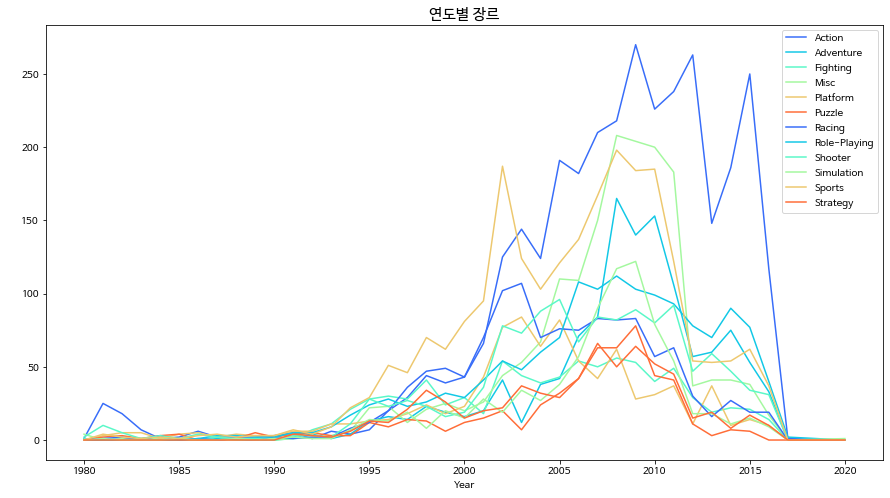

In [19]:
sns.set_palette('rainbow') #원하는 색으로 지정
color = ['']
plt.figure(figsize=(15, 8))
plt.title('연도별 장르', fontsize=15)
plt.xlabel("Year")
plt.ylabel(" ")
genre = df_year_genre.columns
for i in range(1, len(genre)):
  sns.lineplot(data=df_year_genre, x='Year', y=genre[i], label=genre[i])

In [20]:
df_year_plat = df.groupby(['Year', 'Platform'])['Platform'].count().unstack()
df_year_plat = df_year_plat.fillna(0)
df_year_plat.head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
1980.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


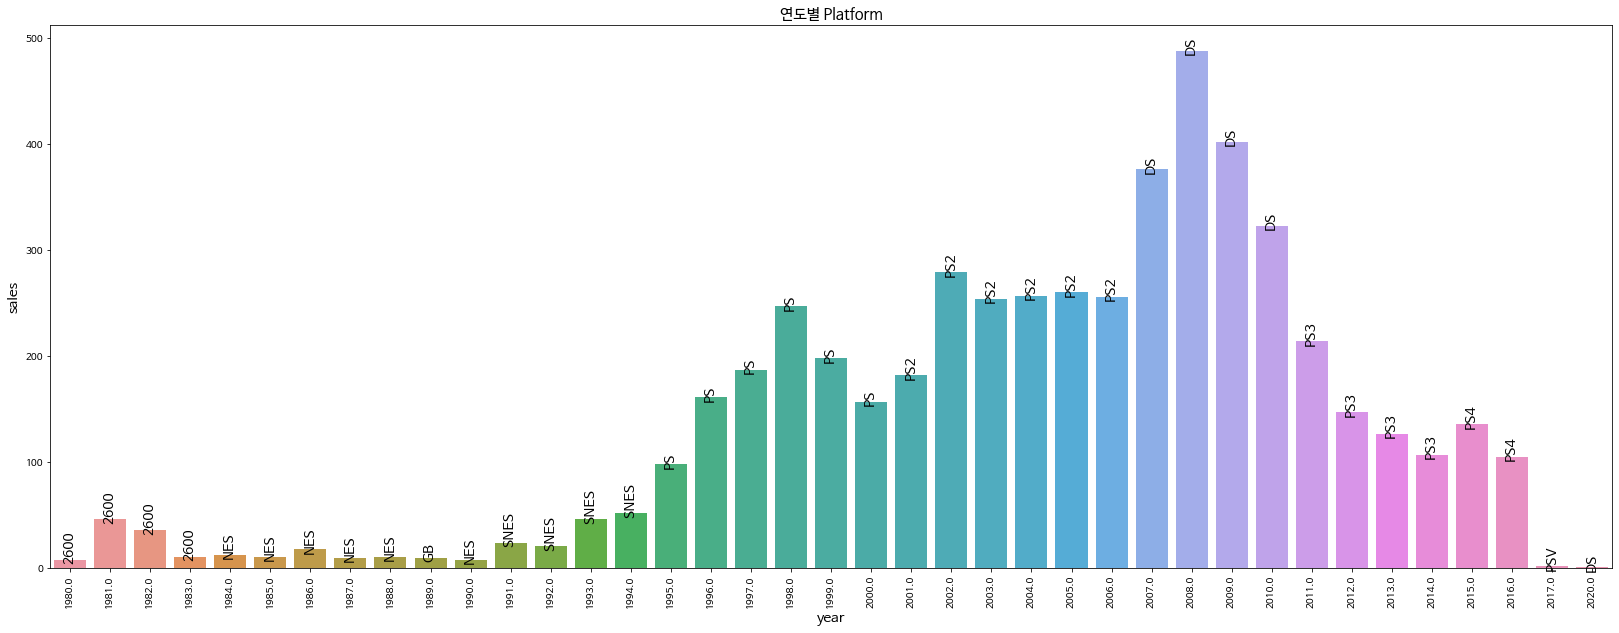

In [21]:
# 플랫폼 갯수
df_year_max = df.groupby(['Year', 'Platform']).size().reset_index(name='count')
# 최댓값
condition = df_year_max.groupby(['Year'])['count'].transform(max) == df_year_max['count']
df_year_max = df_year_max[condition].reset_index(drop=True)
# 중복값 제외하기 keep(first, last) 옵션으로 저장하고 싶은 데이터 선택
df_year_max= df_year_max.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
df_year_max.columns = ['year', 'platform', 'Sales']

# 플랫폼값
platform =df_year_max['platform'].values

# 그래프 그리기
plt.figure(figsize=(28,10))
df_year_pl = sns.barplot(x='year', y='Sales', data=df_year_max)

# plt.text : 그래프위에 글  
idx = 0
for value in df_year_max['Sales']:
    df_year_pl.text(x=idx, y=value , s=str(platform[idx] ),
            color='black', size=14, rotation=90, ha='center') #중앙에 위치
    idx += 1

plt.xticks(rotation=90) #간격

plt.xlabel('year', fontsize=14)
plt.ylabel('sales', fontsize=14)
df_year_pl.set_title('연도별 Platform', fontsize=15)
plt.show()

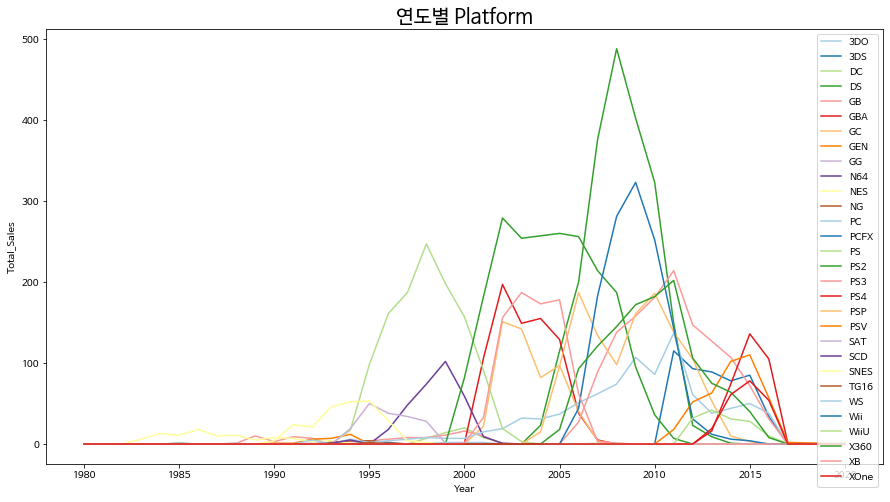

In [22]:
# 플랫폼 종류가 너무많아서 알아보기 힘들어서 그래프 교체

sns.set_palette("Paired",30)
color = ['']
plt.figure(figsize=(15, 8))
plt.title('연도별 Platform', fontsize=20)
plt.xlabel("Year")
plt.ylabel("Total_Sales")
plat = df_year_plat.columns
for i in range(1, len(plat)):
  sns.lineplot(data=df_year_plat, x='Year', y=plat[i], label=plat[i])


In [23]:
df_gener = df.groupby(['Year', 'Genre'])['Genre'].count().unstack()
df_gener = df_gener.fillna(0)
df_gener.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


In [24]:
df_gener.loc['1980-1989', :] = df_gener.loc[[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0]].sum()
df_gener.loc['1990-1999', :] = df_gener.loc[[1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0]].sum()
df_gener.loc['2000-2009', :]= df_gener.loc[[2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0]].sum()
df_gener.loc['2010-2020', :] = df_gener.loc[[2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,2017.0,2020.0]].sum()

df_gener= df_gener.loc[['1980-1989', '1990-1999', '2000-2009', '2010-2020']]
df_gener.reset_index()
df_gener

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980-1989,66.0,2.0,4.0,8.0,32.0,19.0,8.0,9.0,30.0,3.0,22.0,0.0
1990-1999,158.0,96.0,191.0,115.0,124.0,71.0,179.0,171.0,136.0,86.0,303.0,121.0
2000-2009,1573.0,629.0,440.0,991.0,559.0,356.0,791.0,728.0,712.0,547.0,1397.0,377.0
2010-2020,1429.0,537.0,194.0,557.0,150.0,112.0,231.0,549.0,390.0,205.0,567.0,166.0


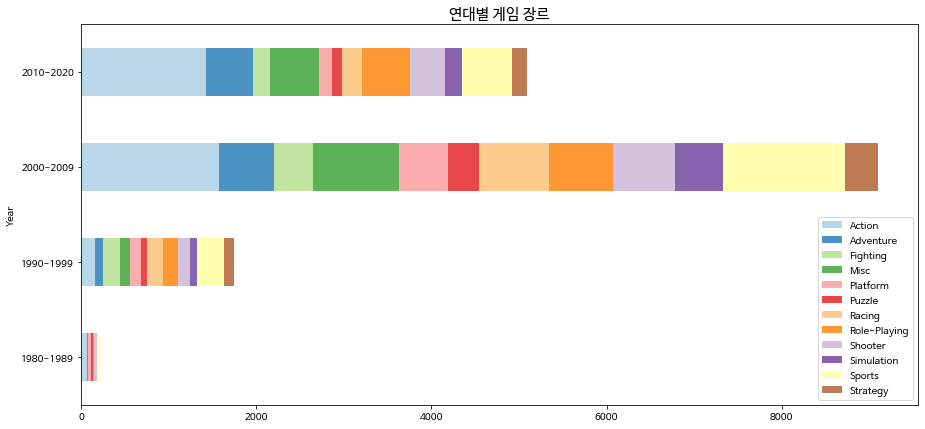

In [25]:
df_gener.plot(kind='barh', stacked=True, figsize=(15, 7), alpha=0.8 )
plt.title('연대별 게임 장르', fontsize=15)
plt.legend(loc='best')

In [27]:
# 지역별 장르 선호도
df_zone_genre= df.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
df_zone_genre.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,21470834.49,7030505.49,1440154.29,1340182.30
Adventure,760100.57,190063.13,80051.71,280016.36
Fighting,1360218.75,1420098.30,1340085.05,500035.60
Misc,4090390.20,2820204.86,420103.29,460072.08
Platform,5220437.24,7620191.78,790128.43,480050.67


Text(0.5, 1.0, '지역별 장르')

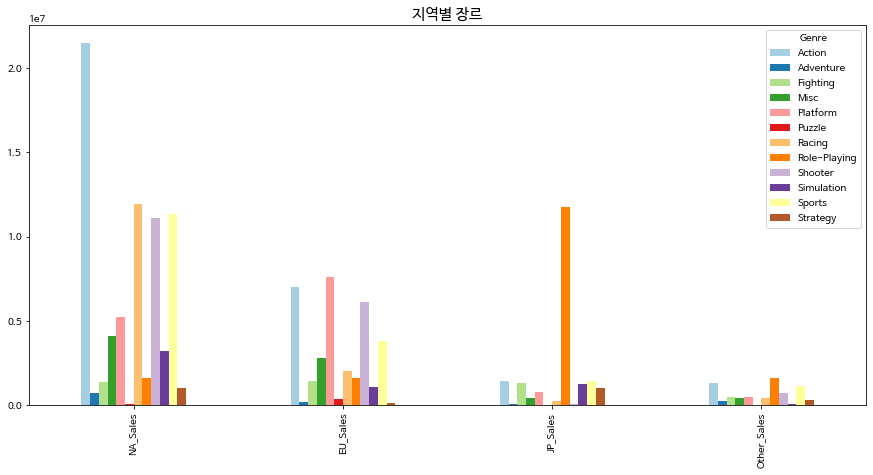

In [28]:

df_zone_genre.T.plot.bar(figsize=(15,7))
plt.title('지역별 장르', fontsize=15)

    Platform       Nation       Sales
0       2600     NA_Sales       80.32
1        3DO     NA_Sales        0.00
2        3DS     NA_Sales   550072.21
3         DC     NA_Sales        5.43
4         DS     NA_Sales  5160376.21
..       ...          ...         ...
119      Wii  Other_Sales   440077.97
120     WiiU  Other_Sales        6.45
121     X360  Other_Sales  1760081.83
122       XB  Other_Sales    40008.23
123     XOne  Other_Sales    10011.91

[124 rows x 3 columns]


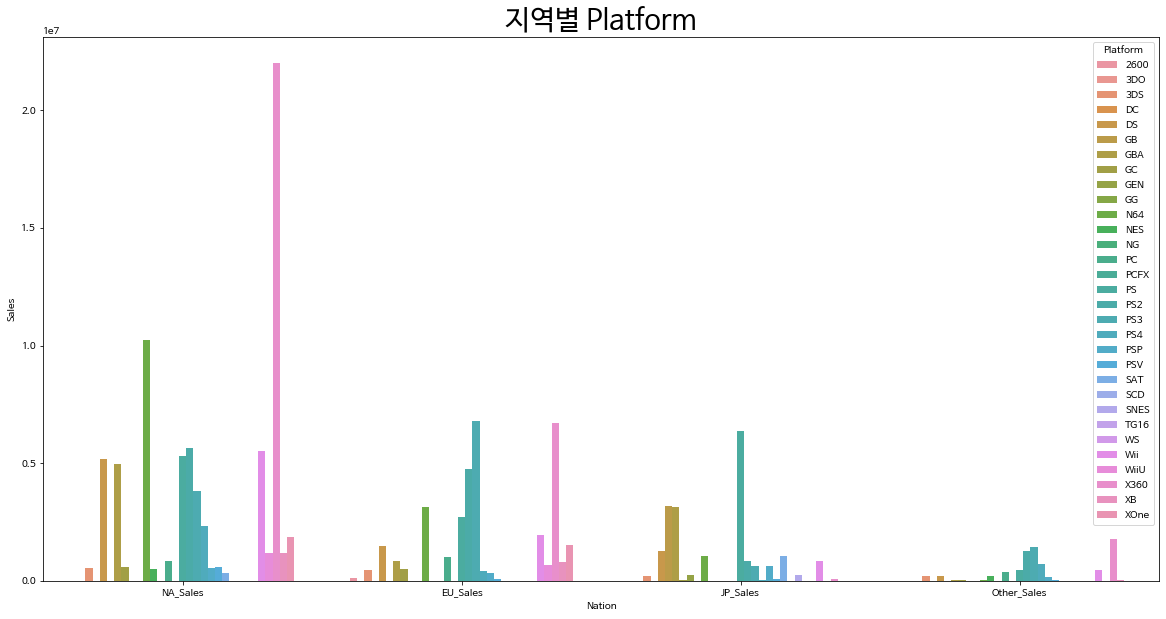

In [29]:
# 지역별 플랫폼 선호도 분석
df_zone_plat = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df_zone_plat.columns = ['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_zone_plat_grouped =df_zone_plat.groupby(['Platform']).sum()
df_zone_plat_grouped = df_zone_plat_grouped.reset_index()
df_zone_plat_melt= pd.melt(df_zone_plat_grouped, id_vars=['Platform'], value_vars=df_zone_plat_grouped.columns[1:],
                         var_name='Nation', value_name='Sales')
print(df_zone_plat_melt)


plt.figure(figsize=(20,10))
df_zone_plt = sns.barplot(x='Nation', y='Sales', hue='Platform', data=df_zone_plat_melt)
df_zone_plt.set_title('지역별 Platform', fontsize=28)

plt.show()


# plt.figure(figsize=(20,10))
# ax = sns.barplot(x='Platform', y='Sales', hue='Nation', data=df_zone_plat_melt)
# ax.set_title('지역별 Platform', fontsize=28)

# plt.show()


In [30]:
#genre
df_top = df.sort_values(by='Total_Sales', ascending=False).head(10)
df_top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75
12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32
1964,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34
8533,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3120000.00,0.59,3120011.52
9829,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2930000.00,1.25,0.83,0.20,2930002.28
7865,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2930000.00,0.01,0.46,2930001.39
6458,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2850000.00,1.91,0.23,2850009.05
3589,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,2780002.53


In [31]:
df_top_10=df_top[['Name','Platform','Genre']]
df_top_10

,Name,Platform,Genre
10913,Grand Theft Auto V,X360,Action
12600,Halo: Reach,X360,Shooter
577,Mario Kart 64,N64,Racing
1964,The Legend of Zelda: Ocarina of Time,N64,Action
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing
8533,Pokémon Yellow: Special Pikachu Edition,GB,Role-Playing
9829,Super Mario Bros. 3,GBA,Platform
7865,FIFA 14,X360,Sports
6458,Super Mario 64,N64,Platform
3589,Final Fantasy IX,PS,Role-Playing


In [32]:
# top10 platform별
df_top_platform = df_top.groupby(['Platform'])['Total_Sales'].sum()
df_top_platform = df_top_platform.to_frame()
df_top_platform = df_top_platform .reset_index()
df_top_platform

,Platform,Total_Sales
0,GB,3120011.52
1,GBA,6080009.62
2,N64,12500016.87
3,PS,2780002.53
4,X360,19590010.98


In [33]:
# df_top_platform_sum= df_top_platform['Total_Sales'].sum()

# df_top_platform["출고율"] = round((df_top_platform['Total_Sales'] / df_top_platform_sum) * 100, 2)

# plt.figure(figsize=(15, 7))
# df_top_platform['출고율'].plot(kind = "pie", autopct = '%1.1f%%')
# plt.title('TOP10 Platform', fontsize=15)

Text(0.5, 1.0, 'TOP10 Platform')

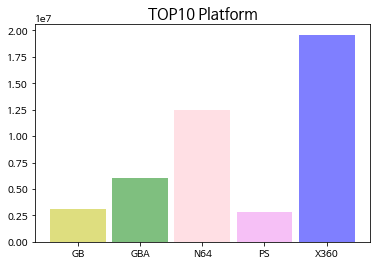

In [34]:
x=df_top_platform['Platform']
y=df_top_platform['Total_Sales']
plt.bar(x, y,color = ['y', 'g', 'pink', 'violet','b'], alpha = 0.5, width = 0.9)
plt.title('TOP10 Platform', fontsize=15)


In [35]:
# top10 Genre별
df_top_Genre = df_top.groupby(['Genre'])['Total_Sales'].sum()
df_top_Genre = df_top_Genre.to_frame()
df_top_Genre

,Total_Sales
Genre,
Action,13730010.25
Platform,5780011.33
Racing,5550004.32
Role-Playing,9050021.39
Shooter,7030002.84
Sports,2930001.39


In [36]:

df_top_Genre_sum = df_top_Genre['Total_Sales'].sum()

df_top_Genre["출고율"] = round((df_top_Genre['Total_Sales'] /df_top_Genre_sum) * 100, 2)
df_top_Genre

,Total_Sales,출고율
Genre,,
Action,13730010.25,31.15
Platform,5780011.33,13.12
Racing,5550004.32,12.59
Role-Playing,9050021.39,20.54
Shooter,7030002.84,15.95
Sports,2930001.39,6.65


Text(0.5, 1.0, 'TOP10 Genre')

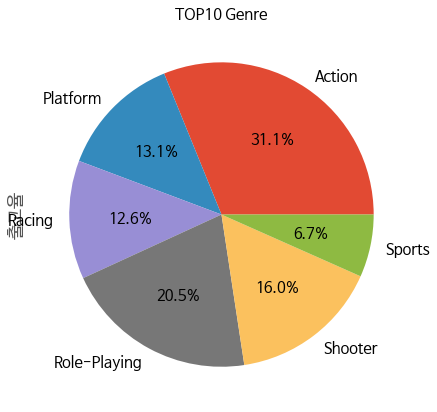

In [49]:
plt.figure(figsize=(15, 7))
df_top_Genre['출고율'].plot(kind = "pie", autopct = '%1.1f%%')

plt.title('TOP10 Genre', fontsize=15)

In [38]:
# 최신 2011년부터 자료
index2=df[df['Year']<=2010].index


df_new=df.drop(index2)
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05
23,Don Bradman Cricket 14,X360,2014.0,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01


In [39]:
!pip install scipy --upgrade

In [40]:
# T-test
df2=df_new['NA_Sales']
df3=df_new['EU_Sales']
df4=df_new['JP_Sales']
pv1=stats.ttest_ind(df2,df3,alternative ='greater').pvalue
print(pv1)
pv2=stats.ttest_ind(df2,df3,alternative ='less').pvalue
print(pv2)

pv3=stats.ttest_ind(df3,df4,alternative ='greater').pvalue
print(pv3)
pv4=stats.ttest_ind(df3,df4,alternative ='less').pvalue
print(pv4)

pv5=stats.ttest_ind(df2,df4,alternative ='greater').pvalue
print(pv5)
pv6=stats.ttest_ind(df2,df4,alternative ='less').pvalue
print(pv6)


# t-test 결과 NA,EU의 판매량은 통계적으로 유의미한 차이가 없다.
# JP는 NA,EU 판매량이 적다. 


0.20855799875678782
0.7914420012432122
0.009096487622645031
0.990903512377355
0.021912754113405642
0.9780872458865943


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


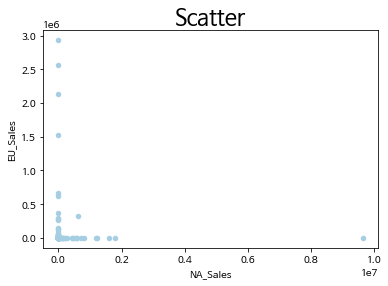

In [41]:

df_new.plot(kind='scatter',x='NA_Sales',y='EU_Sales') 
plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (14,4) # 기본 그래프 크기 설정 
plt.rcParams["font.size"]=15 # 기본 글자 크기 설정 
plt.title('Scatter') 
plt.show()


In [42]:

df_new["Total_NA_EU"] = (df_new['NA_Sales']+df_new['EU_Sales'])
df_new.head()



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Total_NA_EU
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01,0.08,0.07
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Namco Bandai Games,0.00,0.00,0.03,0.00,0.03,0.00
18,Grand Kingdom,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.00,0.03,0.00,0.05,0.02
23,Don Bradman Cricket 14,X360,2014.0,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01,0.01


In [43]:
df_new_group= df_new.groupby(['Platform'	,'Genre'])['Genre'].count().unstack()
df_new_group= df_new_group.fillna(0)
df_new_group

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,179.0,36.0,14.0,51.0,28.0,19.0,10.0,84.0,6.0,27.0,25.0,15.0
DS,46.0,16.0,2.0,37.0,11.0,26.0,3.0,11.0,3.0,13.0,8.0,7.0
PC,83.0,28.0,3.0,7.0,6.0,12.0,27.0,40.0,59.0,37.0,22.0,44.0
PS2,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
PS3,226.0,55.0,47.0,46.0,17.0,1.0,36.0,75.0,78.0,16.0,89.0,12.0
PS4,121.0,19.0,17.0,15.0,11.0,1.0,16.0,47.0,33.0,5.0,42.0,5.0
PSP,78.0,99.0,10.0,24.0,0.0,0.0,1.0,62.0,0.0,2.0,20.0,13.0
PSV,139.0,84.0,16.0,24.0,10.0,3.0,11.0,81.0,4.0,3.0,22.0,7.0
Wii,50.0,5.0,3.0,63.0,8.0,2.0,10.0,9.0,6.0,4.0,33.0,3.0


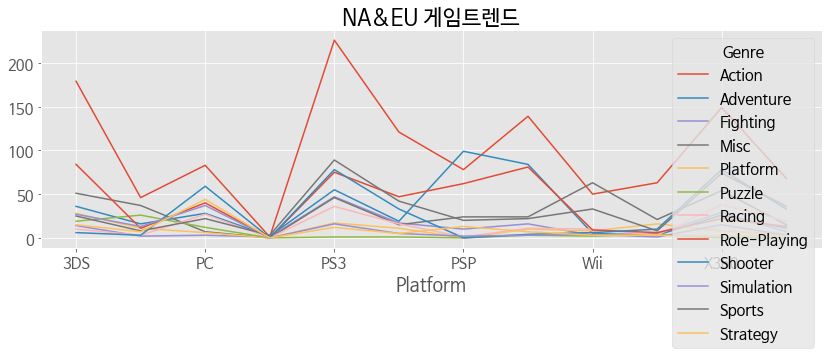

In [44]:
df_new_group.plot()
plt.title('NA&EU 게임트렌드')

plt.show()

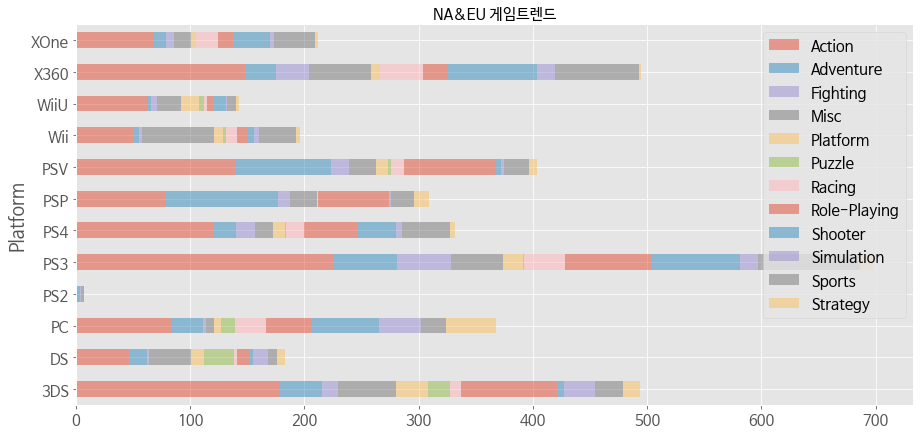

In [45]:

df_new_group.plot(kind='barh', stacked=True, figsize=(15, 7),alpha=0.5 )
plt.title('NA&EU 게임트렌드', fontsize=15)
plt.legend(loc='best')